In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
# importing dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# making folder names as class names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# how much batches we have
len(dataset)

68

In [6]:
# printing the shape of the first patch
# 32 is the size of the batch 
# 256 is the hight and width of the imges in the batch
# 3 is rgb channels
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


In [7]:
# printing the first img in the first batch

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[140. 134. 138.]
  [137. 131. 135.]
  [126. 120. 124.]
  ...
  [131. 122. 125.]
  [115. 106. 109.]
  [114. 105. 108.]]

 [[141. 135. 139.]
  [137. 131. 135.]
  [129. 123. 127.]
  ...
  [112. 103. 106.]
  [ 94.  85.  88.]
  [ 94.  85.  88.]]

 [[136. 130. 134.]
  [132. 126. 130.]
  [129. 123. 127.]
  ...
  [114. 105. 108.]
  [106.  97. 100.]
  [110. 101. 104.]]

 ...

 [[176. 171. 177.]
  [174. 169. 175.]
  [173. 168. 174.]
  ...
  [147. 141. 145.]
  [150. 144. 148.]
  [153. 147. 151.]]

 [[176. 171. 177.]
  [173. 168. 174.]
  [171. 166. 172.]
  ...
  [148. 142. 146.]
  [151. 145. 149.]
  [153. 147. 151.]]

 [[167. 162. 168.]
  [163. 158. 164.]
  [161. 156. 162.]
  ...
  [145. 139. 143.]
  [146. 140. 144.]
  [148. 142. 146.]]]


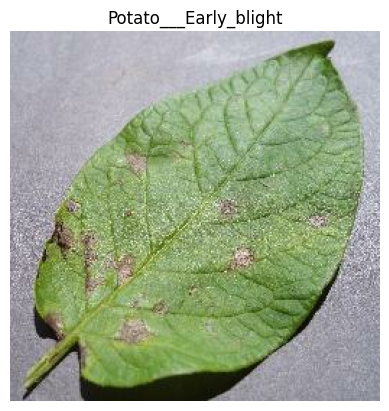

In [8]:
# visualising the first img using matplolib

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

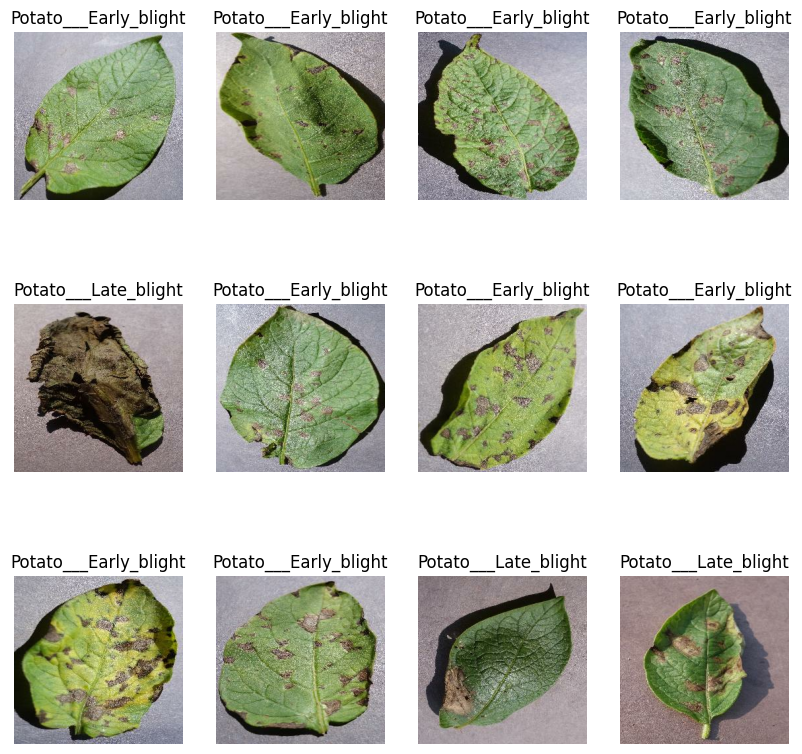

In [9]:
# visualising the first img using matplolib
plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [10]:
# 80% ==> training
# after each epoch do alidition from the 10 percent of images
# 20% ==> 10% validation, 10% test

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
# if we have an img that is not 255 by 255 we resize it
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizeing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# data augmantatin to make our model robust we make adustmint to the imges to make them little difrent, creating 4 new samples to train our model on them and make our model diffrend
